## Result Visualization

In [27]:
import seaborn as sn
import pandas as pd
import numpy as np
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline 

#### Import data in a dataframe.

In [28]:
dataset = pd.read_csv('data/dataset.csv', sep='\t', header=None).applymap(str)
#Get the labels for languages
languages = dataset[dataset.columns[0]].unique()
#Show the labels for categories
categories = dataset[dataset.columns[1]].unique()
#Rename Dataset Columns
dataset.columns = ["Language","Label","Text"]
#Encode the labels of the dataset


In [35]:
len(dataset.Language.unique())

32

In [29]:
dataset['count_rows'] = dataset.groupby(['Language'])['Language'].transform('count')

In [39]:
LangsC = dataset.count_rows.unique()

In [40]:
Langs = dataset.Language.unique()

<BarContainer object of 32 artists>

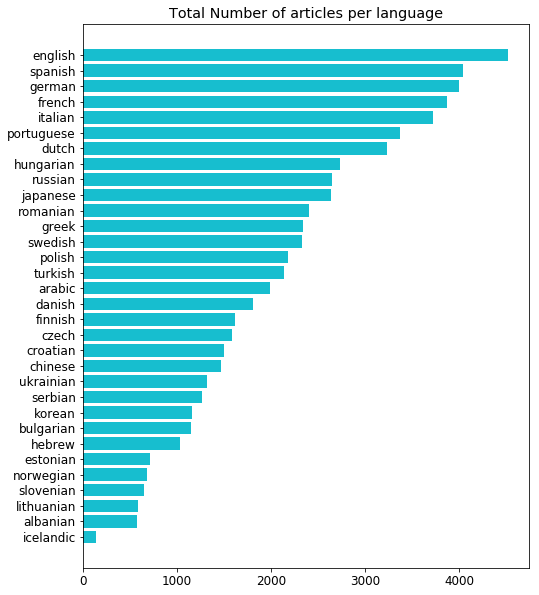

In [375]:
plt.rcParams['figure.figsize'] = [8, 10]
plt.title("Total Number of articles per language")
plt.rcParams.update({'font.size': 13})

plotDF = pd.DataFrame(zip(Langs,LangsC), columns=["Language","Count"])
plotDF = plotDF.sort_values('Count')
plotDF
# plt.barh(Langs,LangsC)
plt.barh(plotDF.Language, plotDF.Count,color = "C9")

In [91]:
plotDF

,Language,Count
16,icelandic,145
1,albanian,572
20,lithuanian,582
27,slovenian,647
21,norwegian,687
9,estonian,711
14,hebrew,1029
3,bulgarian,1152
19,korean,1161
26,serbian,1269


In [135]:
Report = pd.read_csv("report.csv")

In [137]:
Report = pd.merge(left=Report,right=plotDF, how='right', left_on='Language', right_on='Language')
Report = Report.sort_values('Count')
Report

,Language,TrainAccuracy,TestAccuracy,Count
27,icelandic,0.7317,0.7143,145
24,albanian,0.6422,0.5351,572
28,lithuanian,0.4737,0.4737,582
19,slovenian,0.5492,0.4419,647
22,norwegian,0.2617,0.2296,687
25,estonian,0.3824,0.2837,711
12,hebrew,0.3512,0.2976,1029
4,bulgarian,0.6536,0.4348,1152
14,korean,0.4459,0.3247,1161
18,serbian,0.4842,0.3425,1269


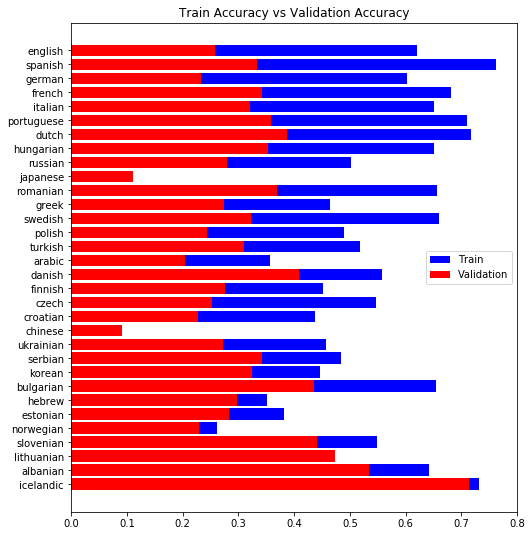

In [152]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 9]

plt.title("Train Accuracy vs Validation Accuracy")

width = 0.27 
ax = plt.subplot(111)
plt1 = ax.barh(Report.Language, Report.TrainAccuracy, color='b', align='center')
plt2 = ax.barh(Report.Language, Report.TestAccuracy, color='r', align='center')

ax.legend('Train', 'Test') 
ax.legend( (plt1[0], plt2[0]), ( 'Train', 'Validation') )

plt.show()

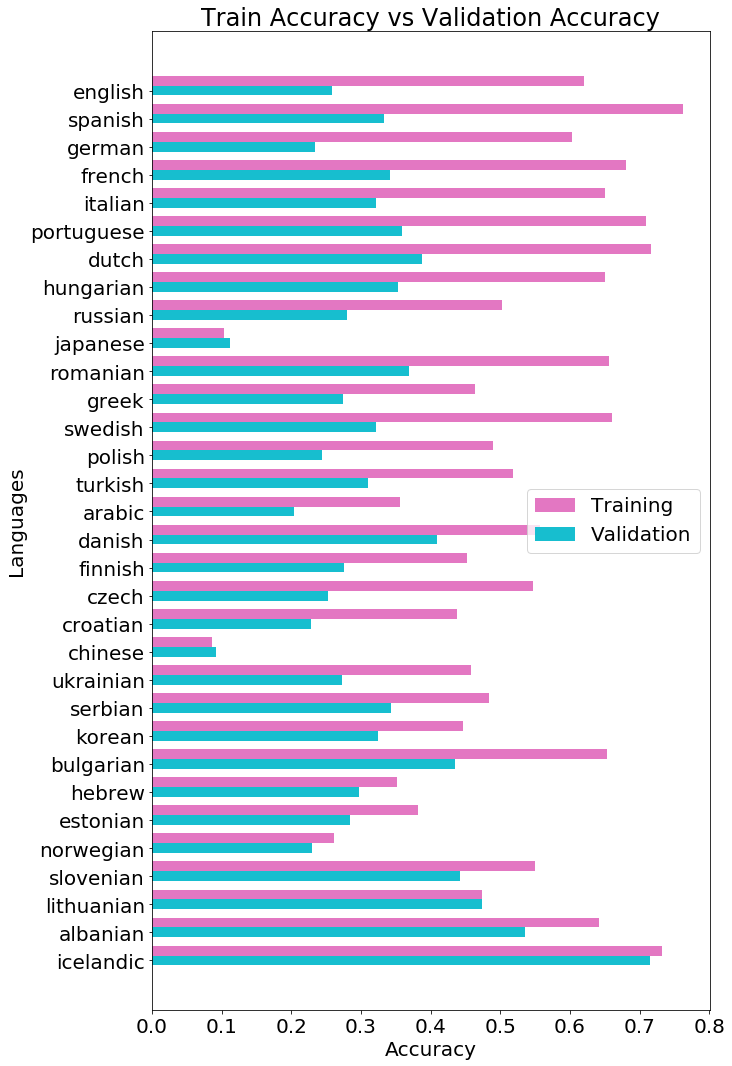

In [407]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 18]
plt.rcParams.update({'font.size': 20})

N = 32
ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals =  Report.TestAccuracy
rects1 = ax.barh(ind+width, yvals, width, color='C9')
zvals = Report.TrainAccuracy
rects2 = ax.barh(ind+width+width, zvals, width, color='C6')

ax.set_ylabel('Languages')
ax.set_xlabel('Accuracy')
ax.set_yticks(ind+width)
ax.set_yticklabels( Report.Language )
ax.set_title("Train Accuracy vs Validation Accuracy")
ax.legend( (rects2[0], rects1[0]), ('Training', 'Validation') )

plt.show()

In [263]:
mycount = dataset.groupby(['Language',"Label"]).count()

In [271]:
mycount


Text  count_rows
Language  Label                                  
albanian  adult                    46          46
          books_and_literature    100         100
          education                20          20
          entertainment           200         200
          finance                   1           1
          media                   100         100
          politics                100         100
          religion                  1           1
          shopping                  3           3
          television                1           1
arabic    adult                   178         178
          books_and_literature     99          99
          business                 61          61
          comic_books               9           9
          dating                   31          31
          education                96          96
          entertainment            74          74
          finance                 100         100
          food                      4           4
          health                   64          64
          hobbies_and_interests    96          96
          illegal_content         100         100
          jewelry                   1           1
          jobs                    100         100
          marketing                 9           9
          media                   100         100
          music                   100         100
          pets                     13          13
          politics                 99          99
          religion                 79          79
...                               ...         ...
turkish   science                  96          96
          shopping                 46          46
          sports                   97          97
          tech                     98          98
          television               37          37
          travel                  100         100
          under_construction        3           3
          vehicles                 67          67
ukrainian adult                   200         200
          books_and_literature     28          28
          business                 36          36
          dating                   10          10
          education               100         100
          entertainment           196         196
          finance                  81          81
          health                  100         100
          hobbies_and_interests     9           9
          illegal_content          17          17
          jobs                    100         100
          media                    99          99
          movies                  100         100
          music                     1           1
          politics                  4           4
          religion                 39          39
          society                  10          10
          sports                   88          88
          tech                      7           7
          television               93          93
          travel                    2           2
          vehicles                  1           1

[922 rows x 2 columns]

In [379]:
AllenReport = pd.read_csv("/home/nesma/Desktop/allen_step1.csv")

In [380]:
AllenReport

,Language,TrainAccuracy,TestAccuracy
0,french,0.878983,0.207572
1,spanish,0.922102,0.176398
2,arabic,0.905531,0.240209
3,english,0.809126,0.104865
4,estonian,0.771626,0.503759


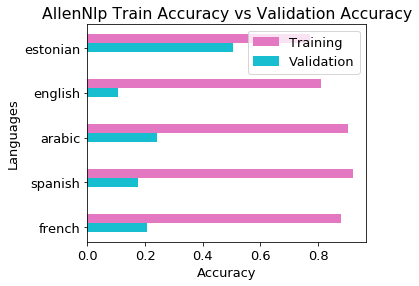

In [408]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams.update({'font.size': 13})

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.20      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals =  AllenReport.TestAccuracy
rects1 = ax.barh(ind+width, yvals, width, color='C9')
zvals = AllenReport.TrainAccuracy
rects2 = ax.barh(ind+width+width, zvals, width, color='C6')

ax.set_ylabel('Languages')
ax.set_xlabel('Accuracy')
ax.set_yticks(ind+width)
ax.set_yticklabels( AllenReport.Language )
ax.set_title("AllenNlp Train Accuracy vs Validation Accuracy")
ax.legend( (rects2[0], rects1[0]), ('Training', 'Validation') )

plt.show()

In [377]:
AllenReport =  pd.read_csv("AllenNlpreport.csv")

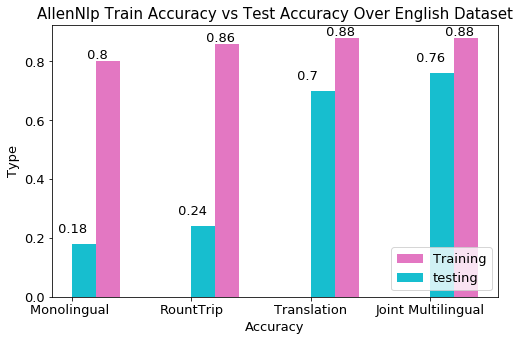

In [378]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({'font.size': 13})

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.20      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals =  AllenReport.TestAccuracy
rects1 = ax.bar(ind+width, yvals, width, color='C9')
zvals = AllenReport.TrainAccuracy
rects2 = ax.bar(ind+width+width, zvals, width, color='C6')

ax.set_ylabel('Type')
ax.set_xlabel('Accuracy')
ax.set_xticks(ind+width/2)
ax.set_xticklabels( AllenReport.Type )
ax.set_title("AllenNlp Train Accuracy vs Test Accuracy Over English Dataset",fontsize=15)
ax.legend( (rects2[0], rects1[0]), ('Training', 'testing'),loc="lower right" )


for i, v in enumerate(yvals):
    plt.text(i - 0.05,v + 0.05 , " "+str(v), color='black', va='center')

for i, v in enumerate(zvals):
    plt.text(i + 0.19 ,v + 0.02 , " "+str(v), color='black', va='center')

plt.show()

In [382]:
KerasReport =  pd.read_csv("Kerasreport.csv")

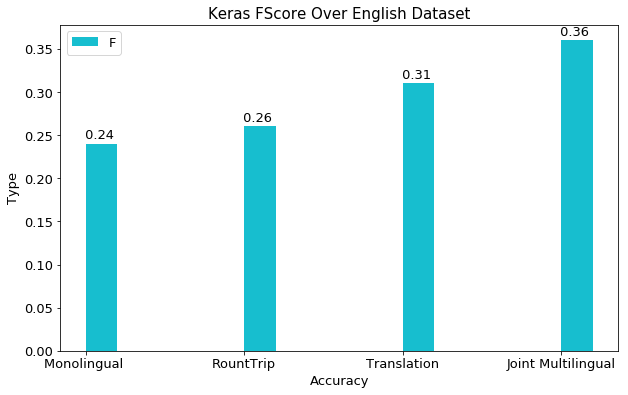

In [406]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 13})

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.20      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals =  KerasReport.Fscore
rects1 = ax.bar(ind+width, yvals, width, color='C9')

ax.set_ylabel('Type')
ax.set_xlabel('Accuracy')
ax.set_xticks(ind+width/2)
ax.set_xticklabels( KerasReport.Type )
ax.set_title("Keras FScore Over English Dataset",fontsize=15)
ax.legend("F1")


for i, v in enumerate(yvals):
    plt.text(i + 0.07 ,v + 0.01 , " "+str(v), color='black', va='center')

plt.show()